## Some configuration before start

In [1]:
# Jupyter magic extensions that makes our live easier
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import sys

In [3]:
# This is needed to see the python scripts logger output, which is the fancy way of print things
logging.basicConfig(
    format="%(asctime)s | %(levelname)s: %(message)s",
    level=logging.INFO,
    stream=sys.stdout,
)

## We can start now!

Some "best practices" things that I readed somewhere:
- Don't mix imports and code in a cell. Make one cell with the imports, and  a second one with the code.

In [4]:
from src.data.make_dataset import example_function

In [5]:
example_function()

This is a print: Importing dataset
2023-02-12 14:01:31,660 | INFO: This is a logging with info level: Making final data set from raw data


In [6]:
def hello_world():
    print("Hello World")

In [7]:
hello_world()

Hello World


## Data Loading

Here I use a classes and other things to practice, but you can create (always should be at the proper script) the function that you specifically need. If you want, you can try to expand the current loader class, and I'll review it.

In [8]:
from src.data.make_dataset import PandasDatasetLoader

In [9]:
dataset_path = "../data/raw"
patient_id = 1110
dataset = PandasDatasetLoader(dataset_path).load_dataset(
    patient_id=patient_id,
    max_patient_files_to_load=10,
    patient_files_to_skip=0,
    skip_missing_files=True,
)

In [10]:
dataset

,utc_timestamp,acc_x,acc_y,acc_z,acc_mag,bvp,eda,hr,temp,patient_id,label
0,1.583462e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1110/010/UTC-2020_03_06-02_40_00.parquet,0
1,1.583462e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1110/010/UTC-2020_03_06-02_40_00.parquet,0
2,1.583462e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1110/010/UTC-2020_03_06-02_40_00.parquet,0
3,1.583462e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1110/010/UTC-2020_03_06-02_40_00.parquet,0
4,1.583462e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1110/010/UTC-2020_03_06-02_40_00.parquet,0
...,...,...,...,...,...,...,...,...,...,...,...
76795,1.583468e+09,49.997694,25.00085,28.004717,61.519593,65.287217,0.256632,47.450892,34.889895,1110/010/UTC-2020_03_06-04_10_00.parquet,0
76796,1.583468e+09,49.997694,25.00085,28.004717,61.519593,64.098439,0.256737,47.450892,34.889895,1110/010/UTC-2020_03_06-04_10_00.parquet,0
76797,1.583468e+09,49.997694,25.00085,28.004717,61.519593,63.092550,0.256737,47.450892,34.889895,1110/010/UTC-2020_03_06-04_10_00.parquet,0
76798,1.583468e+09,49.997694,25.00085,28.004717,61.519593,62.818217,0.256737,47.450892,34.889895,1110/010/UTC-2020_03_06-04_10_00.parquet,0


In [13]:
train_generator, test_generator = PandasDatasetLoader(dataset_path).get_generators(1110)

In [15]:
next(train_generator)

(       utc_timestamp      acc_x      acc_y      acc_z    acc_mag        bvp  \
 0       1.583667e+09 -39.615715 -46.999624  18.003164  63.048723 -59.111772   
 1       1.583667e+09 -39.366581 -46.999624  18.003164  62.895002 -61.382087   
 2       1.583667e+09 -39.117446 -46.999624  18.003164  62.741281 -63.553693   
 3       1.583667e+09 -39.128048 -46.999624  18.003164  62.746582 -65.824008   
 4       1.583667e+09 -39.377182 -46.999624  18.003164  62.900303 -68.193032   
 ...              ...        ...        ...        ...        ...        ...   
 76795   1.583668e+09 -38.995530 -46.999624  18.718762  62.873799  21.533764   
 76796   1.583668e+09 -38.995530 -46.999624  18.464327  62.799589  20.250542   
 76797   1.583668e+09 -38.995530 -46.999624  18.215193  62.730680  18.967321   
 76798   1.583668e+09 -39.032635 -46.999624  18.003164  62.688274  17.684099   
 76799   1.583668e+09 -39.281769 -46.999624  18.003164  62.841995  16.400878   
 
             eda         hr       temp

In [29]:
dataset["label"] = 0
dataset["label"].iloc[:100000] = 1

/tmp/ipykernel_377924/3065629722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["label"].iloc[:100000] = 1


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop("label", axis=1), dataset["label"], test_size=0.33, random_state=42
)

In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
model.score(X_test, y_test)

0.7400804924242425

In [35]:
from sklearn.metrics import roc_auc_score

In [36]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.9367563792110761

In [37]:
from sklearn.metrics import roc_curve

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

In [41]:
import matplotlib.pyplot as plt

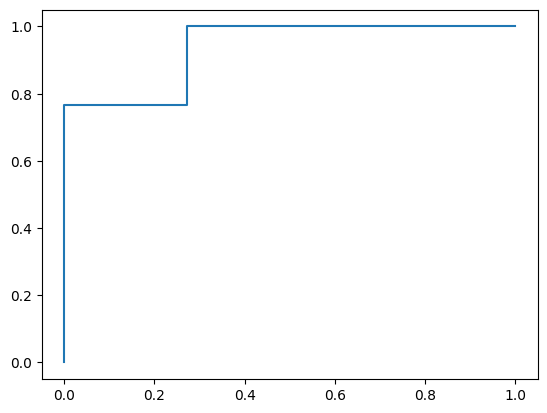

In [42]:
plt.plot(fpr, tpr)

In [46]:
# Get regression weights as dict with dataframe columns as keys
weights = dict(zip(dataset.drop("label", axis=1).columns, model.coef_[0]))

In [48]:
weights

{'utc_timestamp': -6.583257452277163e-10,
 'acc_x': 4.949215171494411e-17,
 'acc_y': 1.522011429893379e-17,
 'acc_z': -6.1327058809918806e-18,
 'acc_mag': -2.609051818324553e-17,
 'bvp': 2.4016443691343185e-19,
 'eda': -1.160650946914007e-18,
 'hr': -2.6350809137748818e-17,
 'temp': -2.2273849572587522e-17,
 'patient_id': -4.572280111042164e-18}

In [ ]:
# tell the model to use the default threshold of 0.5